# Perceptron algoritmus
A perceptron algoritmust először Rosenblatt fejlesztette ki 1958-ban. Egyszerű számítógépként indult, aminek elsődleges fókusza a képfeldolgozás volt. A precpetron tulajdonképpen a következő függvényt valósítja meg:
$$f(x)=\begin{cases}
1 \quad \text{if } w\bullet x + b > 0 \\
0 \quad \text{otherwise}
\end{cases}$$
Vagyis az eddigiekhez hasonlóan, az vizsgáljuk, hogy a bemeneti érték a hipersík melyik oldalán helyezkedik el! 

Az eredeti perceptron pusztán egyrétegű volt: ez azt jelentette, hogy egy feldolgozó egység súlyozását állíthattuk be tanító adathalmaz alapján, ez alapján történt meg a kiement osztályozása.

Nyilvánvaló, hogy egy prceptron önmagaában limitált képességekkel rendelkezik, aránylag kevés osztály következtetésére képes. Ezt Rosenblatt is felismerte. Minsky és Papert könyve a _Perceptronok_ tárgyalja, hogy egy perceptron képtelen a XOR problémát megoldani. Ugyanakkor Minsky és Papert kikövetkeztette azt is, hogy több rétegben a feladat megoldható lenne. Ennek ellenére ez a könyv egy évtizedig elterelte a mesterséges intelligencia kutatóit a konnekcionista modellezéstől, egészen a 80-as évekig a neurális hálózatok témaköre hanyaoglva volt a nyugati kutatók által (MI-tél). Visszamenőlegesen Minsky és Papert könyvük újabb kiadásában ecsetelte a hibát, és jobban kiemelték a többrétegű hálózatok képességeit. Manapság a perceptronok jelentik a legalapvetőbb építőelemeit a neurális hálózatoknak, természetesen az eredeti algoritmushoz képest jelentős változtatásokkal.

A perceptronok algoritmusa kellőképpen egyszerű ahhoz, hogy akár magunk is implementálhassuk!

In [1]:
import numpy as np

Hozzunk létre egy saját adathalmazt. Először egyszerű, egy vonallal elválasztható adathalmazt hozunk létre.

In [2]:
X = np.array([
    [-3.0, 3.0],
    [-2.4, 1.5],
    [-2.12, -1.85],
    [-0.7, -0.5],
    [0.27, 0.45],
    [1.97, -2.45],
    [1.27, -1.45],
    [2.27, 3.45],
])
y = np.array([
    0,
    0,
    0,
    0,
    1,
    1,
    1,
    1
])

In [3]:
import matplotlib.pyplot as plt

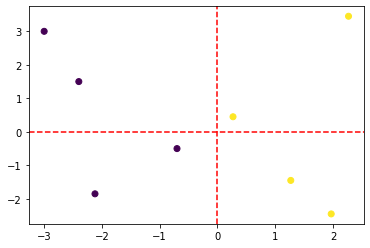

In [4]:
plt.axvline(x=0, color='r', linestyle='--')
plt.axhline(y=0, color='r', linestyle='--')
plt.scatter(X[:,0], X[:,1], c=y)

In [5]:
alpha = 0.4
epsilon = 1e-3
N = 1000

In [6]:
def perceptron(X, y, dim, alpha=0.1, N=1000, epsilon = 1e-3):
    X_ = np.hstack((np.zeros((X.shape[0], 1)), X))
    theta = np.zeros(dim + 1)
    # Store difference
    err_list = []
    for j in range(N):
        dt = X_ @ theta
        h = np.where(dt > theta[0], 1, 0)
        err = y - h
        theta = theta + alpha*(err) @ X_
        # Check convergency
        diff = np.sum(np.abs(err))/X.shape[0]
        err_list.append(diff)
        if diff < epsilon:
            break
    return theta, j, err_list

In [7]:
theta, j, diff  = perceptron(X, y, 2, alpha, N, epsilon)
print("Szükséges iterációk száma: {0}, Hiba {1}".format(j, diff[-1]))
print("Egyenes paraméterei: {0}".format(theta))

Szükséges iterációk száma: 1, Hiba 0.0
Egyenes paraméterei: [0.00000000e+00 2.31200000e+00 2.22044605e-16]


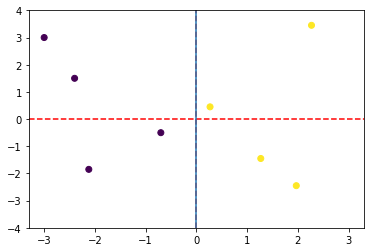

In [8]:
plt.axvline(x=0, color='r', linestyle='--')
plt.axhline(y=0, color='r', linestyle='--')
plt.scatter(X[:,0], X[:,1], c=y)
plt.ylim((-4, 4))
lt = np.linspace(-3, 3, 100)
m = -theta[1]/theta[2]
c = -theta[0]/theta[2]
plt.plot(lt, m * lt + c)

## Nagyobb adathalmaz

In [9]:
from sklearn.datasets import make_blobs

In [10]:
X, y = make_blobs(n_samples=1000, centers=np.array([[3.0, 3.0], [-3.0, -3.0]]), n_features=2, cluster_std=0.4)

In [11]:
theta, j, diff  = perceptron(X, y, 2, alpha, N, epsilon)
print("Szükséges iterációk száma: {0}, Hiba: {1}".format(j, diff[-1]))

Szükséges iterációk száma: 1, Hiba: 0.0


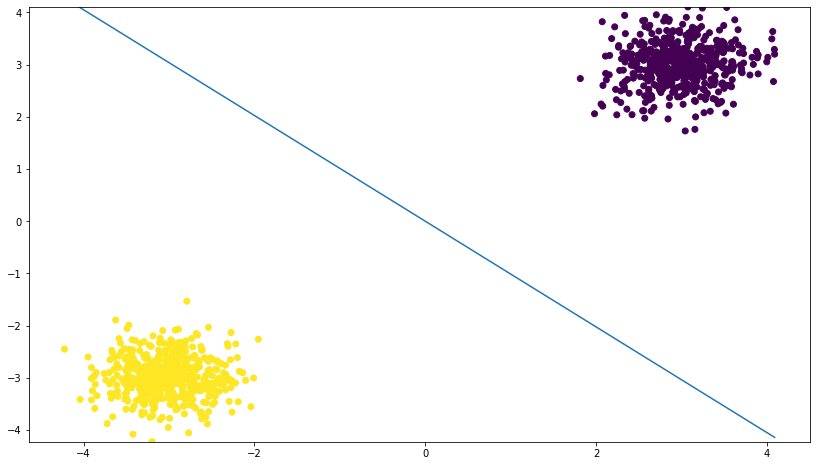

In [12]:
plt.figure(figsize=(14,8))
plt.scatter(X[:,0], X[:,1], c=y)
lt = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
m = -theta[1]/theta[2]
c = -theta[0]/theta[2]
plt.ylim((np.min(X[:,1]), np.max(X[:,1])))
plt.plot(lt, m * lt + c)

## Perceptron nem teljesen elválasztott adathalmazon

In [13]:
X, y = make_blobs(n_samples=10000, centers=np.array([[3.5, 3.5], [-4.5, -4.5]]), n_features=2, cluster_std=2.5)

In [14]:
theta, j, diff  = perceptron(X, y, 2, alpha, N, 2e-2)
print("Szükséges iterációk száma: {0}, Hiba: {1}".format(j, diff[-1]))

Szükséges iterációk száma: 1, Hiba: 0.0149


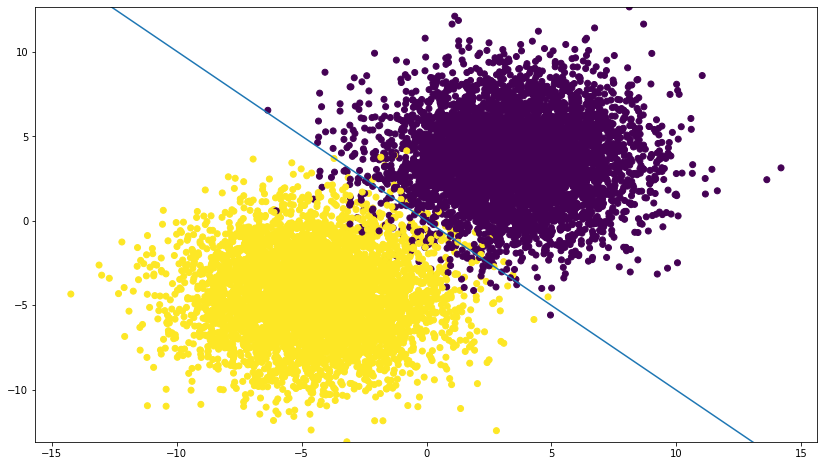

In [15]:
plt.figure(figsize=(14,8))
plt.scatter(X[:,0], X[:,1], c=y)
lt = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
m = -theta[1]/theta[2]
c = -theta[0]/theta[2]
plt.ylim((np.min(X[:,1]), np.max(X[:,1])))
plt.plot(lt, m * lt + c)

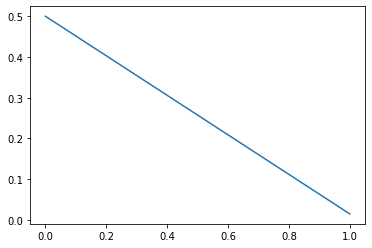

In [16]:
plt.plot(diff)